# Case 2. Diabetic Retinopathy Analysis, 24.2.2019
##### Cognitive Systems for Health Technology Applications, Spring 2019
##### Helsinki Metropolia University of Applied Sciences

##### -Pärnänen Simo, opiskelijanumero 1606318
##### -Sallinen Pasi, opiskelijanumero 1804767

## The background and data preprocessing

The Case 2 is for developing a convolutional neural network. In the Case 1 we practised sequential neural networks and their one difference to convolutional one's is that convolutional accepts 4D tensor data. (a). That means that the data has width, height, color and samples. A key difference for convolution network according to Chollet (2017, 111) compared to neural network is their ability to find local patterns. Dense networks find better main pattern that repeat in the source material.

In this Case 2 we train and test it with medical images called diabetic-retinopathy-screening project. (c). The images handle Diabetic retinopathy, diabetic eye disease “that damages the retina due to diabetes mellitus”. (d). The eye-scan is the only way to diagnose veins of the eyes condition. (d). We use a picture set of the scans and the conditions are scaled from from 0 to 4 as follow:
 -No DR
 
 -Mild
 
 -Moderate
 
 -Severe
 
 -Proliferative DR. (e).

Our one goal differs from the categorising above in the task since we classify the pictures “symptoms” and no-symptoms” according to if the person is sick or healthy.

The dataset had to be downloaded on the computer due to its size of about 2.1 GB. (d). The data preprocessing starts with importing numpy, matplotlib, pandas and os. Then sklearn.preprocessing is imported as normalize and also os and the module shutil. From keras we import libraries metrics, models, layers, optimizers and function ImageDataGenerator.from preprocessing.image.

Then the program checks the downloaded data and lists all filenames in the master dataset and counts how many samples there are. We create eg. a base_dir for the dataset as directory. Then the training, the validation and the test set are created all the same way. They all have subdirectories (sub_dir) which in turn all have subdirectories for the symptoms and symptomless samples. Then directories are created except for train set, because it was defined earlier.

The program recsales all images by 1/255 so that the images are easier to handle. Then they are resized and relabeled.

## The model
The model is quite similar to the one in the course practise Case 1.

We start building the model according the Chollet’s (2017, 122) instructions, where the following structure is recommended and defined, that depth and size are the key features (2017, 113). The depth of the feature maps should be progressively increasing and size of the map decreasing. Our model sequential with activation relu but the last one is sigmoid. The input shape is 150, 150, 3.

Loss function is crossentropy with RMSprop.

# Case 2. Diabetic Retinopathy Analysis, 24.2.2019
##### Cognitive Systems for Health Technology Applications, Spring 2019
##### Helsinki Metropolia University of Applied Sciences

##### -Pärnänen Simo, opiskelijanumero 1606318
##### -Sallinen Pasi, opiskelijanumero 1804767

## The background and data preprocessing

The Case 2 is for developing a convolutional neural network. In the Case 1 we practised sequential neural networks and their one difference to convolutional one's is that convolutional accepts 4D tensor data. (a). That means that the data has width, height, color and samples. A key difference for convolution network according to Chollet (2017, 111) compared to neural network is their ability to find local patterns. Dense networks find better main pattern that repeat in the source material.

In this Case 2 we train and test it with medical images called diabetic-retinopathy-screening project. (c). The images handle Diabetic retinopathy, diabetic eye disease “that damages the retina due to diabetes mellitus”. (d). The eye-scan is the only way to diagnose veins of the eyes condition. (d). We use a picture set of the scans and the conditions are scaled from from 0 to 4 as follow:
 -No DR
 
 -Mild
 
 -Moderate
 
 -Severe
 
 -Proliferative DR. (e).

Our one goal differs from the categorising above in the task since we classify the pictures “symptoms” and no-symptoms” according if the person is sick or healthy.

The dataset had to be downloaded on the computer due to its size of about 2.1 GB. (d). The data preprocessing starts with importing numpy, matplotlib, pandas and os. Then sklearn.preprocessing is imported as normalize and also os and the module shutil. From keras we import libraries metrics, models, layers, optimizers and function ImageDataGenerator.from preprocessing.image.

Then the program checks the downloaded data and lists all filenames in the master dataset and counts how many samples there are. We create eg. a base_dir for the dataset as directory. Then the training, the validation and the test set are created all the same way. They all have subdirectories (sub_dir) which in turn all have subdirectories for the symptoms and symptomless samples. Then directories are created except for train set, because it was defined earlier.

The program recsales all images by 1/255 so that the images are easier to handle. Then they are resized and relabeled.

## The model
The model is quite similar to the one in the course practise Case 1.

We start building the model according the Chollet’s (2017, 122) instructions, where the following structure is recommended and defined, that depth and size are the key features (2017, 113). The depth of the feature maps should be progressively increasing and size of the map decreasing. Our model is sequential relying mostly on rectifier linear units (ReLU) as activation functions  but the last one is sigmoid. The input shape is 150, 150, 3.

Loss function is crossentropy with RMSprop.

We should also experiment more with the model's layer structure this time by adding some regularizers, which help in minimizing overfitting by penalizing very large weights chosen by the optimizer to a certain degree.















In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from keras import metrics
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import os, shutil


Time elapsed for copying the images to the new directories: 32.09 sec

Testing the retrieval of images from the new  training and testing directories:

Found 987 images belonging to 2 classes.
Found 419 images belonging to 2 classes.
Test 1


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
______

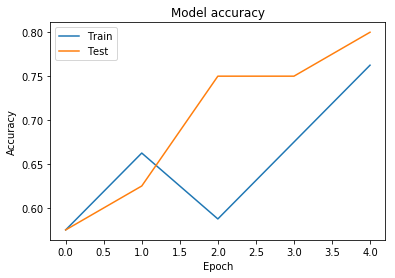

Time taken: 56.75 seconds


In [3]:
def trainnetwork(model, train_generator, validation_generator, stepsperepoch, validstepsperepoch, epochs):

    print('\nStructure of the layers\n')
    model.summary() 
    time_start=time.time()
    model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])


    model=model.fit_generator(train_generator, steps_per_epoch=stepsperepoch, epochs=epochs, verbose=1, validation_data=validation_generator, validation_steps=validstepsperepoch, class_weight=None, initial_epoch=0) 

    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    time_end=time.time()
    print('Time taken: {:.2f} seconds'.format(time_end - time_start))

# LIST ALL FILENAMES IN THE MASTER DATASET AND COUNT HOW MANY SAMPLES #THERE ARE.
original_dir = './retinopathy-dataset-master'


original_nosymptoms_dir = os.path.join(original_dir, 'nosymptoms')
nosymptoms_fnames = os.listdir(original_nosymptoms_dir)


original_symptoms_dir = os.path.join(original_dir, 'symptoms')
symptoms_fnames = os.listdir(original_symptoms_dir)

len(nosymptoms_fnames), len(symptoms_fnames)

#READ DATA 

#DATA PREPROCESSING

# THIS IS THE DIRECTORY WHERE THE DATASETS WILL BE CREATED
base_dir = './dataset2'

# FOR TRAINING SET
sub_dir = 'train'
train_dir = os.path.join(base_dir, sub_dir)
train_nosymptoms_dir = os.path.join(base_dir, sub_dir, 'nosymptoms')
train_symptoms_dir = os.path.join(base_dir, sub_dir, 'symptoms')

# FOR VALIDATION SET
sub_dir = 'validation'
validation_dir = os.path.join(base_dir, sub_dir)
validation_nosymptoms_dir = os.path.join(base_dir, sub_dir, 'nosymptoms')
validation_symptoms_dir = os.path.join(base_dir, sub_dir, 'symptoms')

# FOR TEST SET
sub_dir = 'test'
test_dir = os.path.join(base_dir, sub_dir)
test_nosymptoms_dir = os.path.join(base_dir, sub_dir, 'nosymptoms')
test_symptoms_dir = os.path.join(base_dir, sub_dir, 'symptoms')


#DEFINE VARIABLES FOR THE TRAINING AND VALIDATION DIRECTORIES. 
#VARIABLE FOR THR TEST DIRECTORY ALREADY DEFINED ABOVE

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

#CREATE THE DATASETS WITH NEW FOLDERS (NO LONGER NEEDED IF ALREADY CREATED)
#
#try:
#    print('Creating dataset folders to:', base_dir)
#    os.mkdir(base_dir)
#    os.mkdir(train_dir)
#    os.mkdir(train_nosymptoms_dir)
#    os.mkdir(train_symptoms_dir)
#    os.mkdir(validation_dir)
#    os.mkdir(validation_nosymptoms_dir)
#    os.mkdir(validation_symptoms_dir)
#    os.mkdir(test_dir)
#    os.mkdir(test_nosymptoms_dir)
#    os.mkdir(test_symptoms_dir)
#    print('Done.')
#except:
#    print('Error:')
#    print(base_dir, 'already exists!')




#CREATE THE TRAINING, VALIDATION AND TEST SETS
np.random.seed(2019)


# HEALTHY (NOSYMPTOM) CASES SPLIT

# TAKE 25 % OUT FOR TESTING
train_nosymptoms_fnames, test_nosymptoms_fnames = train_test_split(nosymptoms_fnames, test_size = 0.25)

# FROM THE REMAINING TAKE 1/3 OUT FOR VALIDATION
train_nosymptoms_fnames, validation_nosymptoms_fnames = train_test_split(train_nosymptoms_fnames, test_size = 1.0/3.0)

len(train_nosymptoms_fnames), len(validation_nosymptoms_fnames), len(test_nosymptoms_fnames)
# PRINT(TRAIN_NOSYMPTOMS_FNAMES)
# PRINT(VALIDATION_NOSYMPTOMS_FNAMES)
# PRINT(TEST_NOSYMPTOMS_FNAMES)

# DISEASE (SYMPTOM) CASES SPLIT

# TAKE 25% OUT FOR TESTING
train_symptoms_fnames, test_symptoms_fnames = train_test_split(symptoms_fnames, test_size = 0.25)

# FROM THE REMAINING IMAGES TAKE 1/3 OUT FOR VALIDATION (= (1-0.25)*1/3 = 0.25)
train_symptoms_fnames, validation_symptoms_fnames = train_test_split(train_symptoms_fnames, test_size = 1.0/3.0)

len(train_symptoms_fnames), len(validation_symptoms_fnames), len(test_symptoms_fnames)
# CHECK NAMES
# PRINT(TRAIN_SYMPTOMS_FNAMES)
# PRINT (VALIDATION_SYMPTOMS_FNAMES)
# PRINT(TEST_SYMPTOMS_FNAMES)

#START THE PREPROCESSING SESSION

tStart = time.time()

# COPY THE ORIGINAL FILES INTO THE DATASET FOLDERS

# TRAINING SET
# DISEASE
for fname in train_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(train_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# HEALTHY 
for fname in train_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(train_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

# VALIDATION SET
# DISEASE
for fname in validation_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(validation_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# HEALTHY
for fname in validation_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(validation_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

# TEST SET
# DISEASE
for fname in test_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(test_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# HEALTHY
for fname in test_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(test_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

tStop = time.time()
tElapsed = tStop - tStart
print('Time elapsed for copying the images to the new directories: {:.2f} sec'.format(tElapsed)+'\n')
print('Testing the retrieval of images from the new  training and testing directories:\n')
# ALL IMAGES WILL BE RESCALEd TO 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
# THIS IS THE TARGET DIRECTORY
    train_dir,
# ALL IMAGES WILL BE RESIZED TO 150x150
    target_size=(150, 150),

    # WE READ IMAGES IN BATCHES
    batch_size=16,
    
    # BINARY LABELS BECAUSE OF BINARY CROSSENTROPY
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

#BUILD THE MODEL
    
model1 = models.Sequential()
    
#EXPERIMENT WITH PARAMETER: KERNEL_REGULARIZER=REGULARIZERS.L1(0.01) 
#(SUM OF SQUARES) OR KERNEL_REGULARIZER=REGULARIZERS.L2(0.01) 
#(PRODUCT OF SQUARES) TO AVOID OVERFITTING
print('Test 1\n')
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

#TRAINNETWORK(MODEL, TRAIN GENERATOR, VALIDATION GENERATOR, TRAINING STEPS PER EPOCH, VaLIDATION STEPS PER EPOCH, NUMBER OF EPOCHS)
trainnetwork(model1, train_generator, validation_generator, 5, 5, 5)




Test 2


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

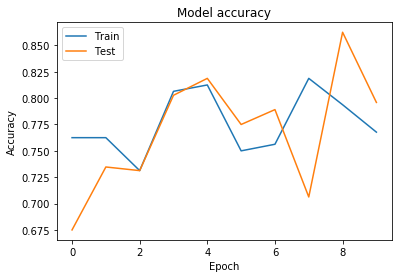

Time taken: 226.39 seconds


In [10]:
# FINAL TRAIN ACCURACY OF 62,50 PERCENT, TEST ACCURACY OF 78,75 PERCENT, TIME TAKEN: 70 SECONDS
# LET US TRY INCREASING TRAINING STEPS PER EPOCH, VALIDATION STEPS PER EPOCH AND EPOCHS TO 10
print("Test 2\n")
trainnetwork(model1, train_generator, validation_generator, 10, 10, 10)

Test 3


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

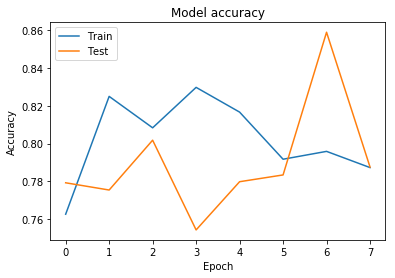

Time taken: 303.00 seconds


In [11]:
#FINAL TRAIN ACCURACY OF 75,88 PERCENT, TEST ACCURACY OF 79,50 PERCENT, TIME TAKEN: 226,39 SECONDS
#THE DISCREPANCY BETWEEN FINAL TRAINING AND TEST ACCURACY IS MUCH SMALLER THAN IN PREVIOUS RUN, AND TEST ACCURACY IS SLIGHTLY BETTER
#BUT THE ACCURACY FOR BOTH STARTED DECREASING FROM EPOCH 8 ONWARDS
#LET US TRY LOWERING EPOCHS TO 8 AND INCREASING STEPS PER EPOCH AND VALIDATION STEPS PER EPOCH TO 15
print("Test 3\n")
trainnetwork(model1, train_generator, validation_generator, 15, 15, 8)

Test 4


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

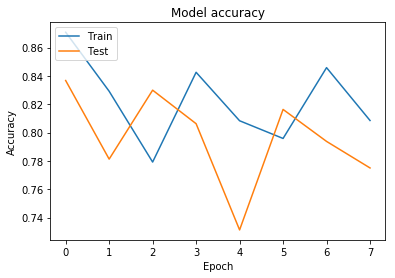

Time taken: 247.54 seconds


In [13]:
#FINAL TRAIN ACCURACY OF 78,78 PERCENT, TEST ACCURACY OF 78,70 PERCENT, TIME TAKEN: 303,00 SECONDS
#THE DISCREPANCY BETWEEN FINAL TRAINING AND TEST ACCURACY IS ALMOST NONEXISTENT, TRAIN ACCURACY IS BETTER,
#TEST ACCURACY IS SLIGHTLY WORSE, QUICK DECREASE IN ACCURACY FROM EPOCH 6 ONWARDS
#LET US TRY LOWERING VALIDATION STEPS TO 10
print("Test 4\n")
trainnetwork(model1, train_generator, validation_generator, 15, 10, 8)

Test 5


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

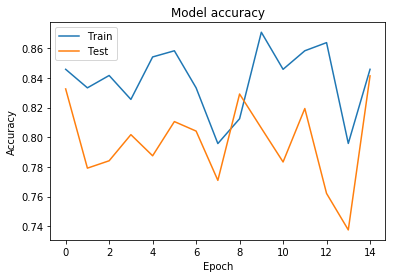

Time taken: 491.40 seconds


In [16]:
#FINAL TRAIN ACCURACY OF 80,69 PERCENT, TEST ACCURACY OF 77,550 PERCENT, TIME TAKEN: 247,54 SECONDS
#THE DISCREPANCY BETWEEN FINAL TRAINING AND TEST ACCURACY HAS INCREASED, TRAIN ACCURACY IS BETTER
#BUT TEST ACCURACY IS SLIGHTLY WORSE THAN BEFORE, ONCE AGAIN A DROP IN ACCURACIES DURING THE LAST 2-3 EPOCHS
#DECREASING VALIDATION STEPS IN PROPORTION TO TRAINING STEPS WAS MOST LIKELY A BAD IDEA
#LET US INCREASE VALIDATION STEPS PER EPOCH BACK TO 15 AND EPOCHS TO 15
print("Test 5\n")
trainnetwork(model1, train_generator, validation_generator, 15, 15, 15)

Test 6


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

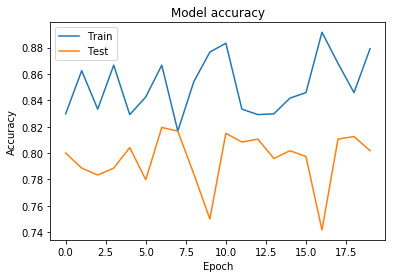

Time taken: 639.54 seconds


In [17]:
#FINAL TRAIN ACCURACY OF 84,58 PERCENT, TEST ACCURACY OF 84,1 PERCENT, TIME TAKEN: 491,40 SECONDS
#MAKING PROGRESS, BOTH TRAIN AND TEST ACCURACIES ARE LARGER THAN EVER BEFORE AND THE DIFFERENCE IS MINIMAL
#THE TRAINING STILL DOESN'T TAKE TOO MUCH TIME,
#LET US TRY INCREASING EPOCHS ONCE MORE TO SEE THAT THE SUDDEN INCREASE IN ACCURACIES AND DECREASE IN DIFFERENCES
#WAS NOT MERELY LUCK

print("Test 6\n")
trainnetwork(model1, train_generator, validation_generator, 15, 15, 20)

Test 7


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

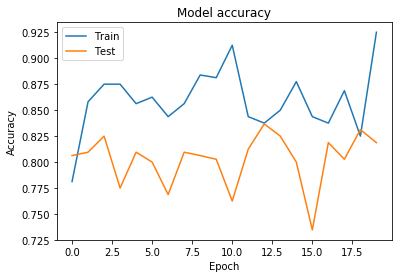

Time taken: 444.11 seconds


In [18]:
#TRAIN ACCURACY 87,92 PERCENT, VALIDATION ACCURACY 80 PERCENT, TIME TAKEN: 639,54 SECONDS
#TRAIN ACCURACY IS LARGER THAN EVER BEFORE AT 87,9 PERCENT BUT VALIDATION ACCURACY HAS LOWERED BY SEVERAL PERCENT
#THIS IS A SIGN OF OVERFITTING, LET US DECREASE TRAINING STEPS AND VALIDATION STEPS PER EPOCH TO 10
print("Test 7\n")
trainnetwork(model1, train_generator, validation_generator, 10, 10, 20)

Test 8


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248) 

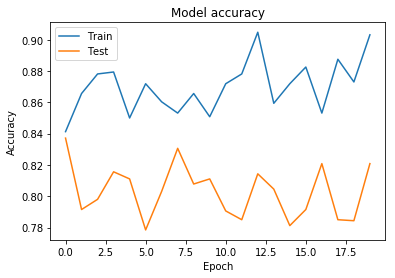

Time taken: 895.83 seconds


In [19]:
#TRAIN ACCURACY 92,950 PERCENT, VALIDATION ACCURACY 80 PERCENT, TIME TAKEN: 444,11 SECONDS
#THE DIFFERENCE HAS WORSENED WHILE TEST ACCURACY HAS NOT INCREASED
#ONE MORE TRY WITH EPOCHS, TRAINING STEPS AND VALIDATION STEPS PER EPOCH ALL SET TO 20
print("Test 8\n")
trainnetwork(model1, train_generator, validation_generator, 20, 20, 20)

Test 9


Structure of the layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248) 

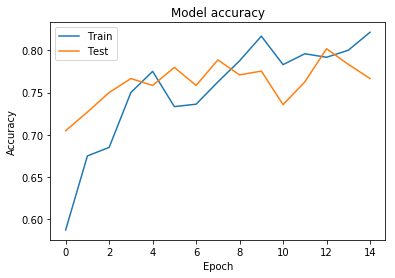

Time taken: 470.50 seconds


In [6]:
#TRAIN ACCURACY 90,31 PERCENT, VALIDATION ACCURACY ACCURACY 80 PERCENT, TIME TAKEN: 895.83 SECONDS
#LET US ATTEMPT OUR MOST PROMISING RESULT SO FAR (TEST 5) WITH EPOCHS, TRAINING AND VALIDATION STEPS SET TO 15
#AND CHANGE THE LAYER STRUCTURE OF THE MODEL A BIT BY UTILIZING THE KERNEL_REGULARIZER PARAMETER.

model2 = models.Sequential()
    

print('Test 9\n')
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
trainnetwork(model2, train_generator, validation_generator, 15, 15, 15)

## The Results



The results are described in the pictures above with the following settings: <br>
Test 1: filters 32, epochs 5, steps per epoch 5, validation steps per epoch 5, <br>
Final train accuracy of 62,50 percent, Test accuracy of 78,75 percent, Time taken: 70 seconds<br> 
Test 2: filters 32, epochs 10, steps per epoch 10, validation steps per epoch 1 <br>
Final train accuracy of 75,88 percent, Test accuracy of 79,50 percent, Time taken: 226,39 seconds <br>
Test 3: filters 32, epochs 8, steps per epoch 15, validation steps per epoch 15 <br>
Final train accuracy of 78,78 percent, Test accuracy of 78,70 percent, Time taken: 303,00 seconds <br>
Test 4: filters 32, epochs 8, steps per epoch 15, validation steps per epoch 10 <br>
Final train accuracy of 80,69 percent, Test accuracy of 77,550 percent, Time taken: 247,54 seconds <br>
Test 5: filters 32, epochs 15, steps per epoch 15, validation steps per epoch 15 <br>
Final train accuracy of 84,58 percent, Test accuracy of 84,1 percent, Time taken: 491,40 seconds <br>
Test 6: filters 32, epochs 20, steps per epoch 15, validation steps per epoch 15 <br>
Train accuracy 87,92 percent, Test accuracy of 80 percent, Time taken: 639,54 seconds <br>
Test 7: filters 32, epochs 20, steps per epoch 10, validation steps per epoch 10 <br>
Final train accuracy of 92,950 percent, Test accuracy 80 percent, Time taken: 444,11 seconds <br>
Test 8: filters 32, epochs 20, steps per epoch 20, validation steps per epoch 20 <br>
Final train accuracy 90,31 percent, Test accuracy 80 percent, Time taken: 895,83 seconds <br>
Test 9: filters 32, epochs 15, steps per epoch 15, validation steps per epoch 15 with one sum of squares <br> penalizing regularizer term in one of the layers.<br>
Train accuracy 82,12 percent, Test accuracy 76,6 percent, Time taken: 470,50 seconds <br>
  

We can see that the running is measured in several minutes with some settings and it's crucial to not use too many epochs and batch sizes for every epoch the. Our most time consuming setting was test6 that took about 640 seconds with filter 32, epochs 20, steps per epoch 15 and validation steps per epoch 15. You can see even from the graphs that the graph nro 6 is not much better than any other so, actually just by looking them you might think that it's not the best.

Unfortunately, adding one sum of squares penalizer (L1 regularization) term during test 9 didn't increase the final accuracies in comparison to the otherwise similar test 6, but the discrepancies between training and testing accuracies did grow smaller and the run took around 20 seconds less time.
 <br>

## The Conclusions


 There are 540 symptomatic samples out of a total of 987 samples in the training set and 149 symptomatic samples out of a total of 419 samples in the test set, so judging by this sample data the probability of simply blindly guessing a sample as a diabetic retinopathy case should be around 49%, which would be a significant overestimation with accuracy around or below 90 percent for a statistical real-life large scale survey of diabetics, because it is estimated that around 40-45 percent of all diabetes patients in USA, with one of the highest diabetic populations in proportion to the total population, show symptoms of diabetic retinopathy. Unfortunately the best test accuracy we could achieve was 84,1 percent, so we have failed the objective of creating a reliable and useful automatic predictor.
 <br>
 <br>
We have however gained experience developing two neural networks from scratch and based on that there is a reason to try to achieve proper, good aka well optimized results in reasonable amount of time. As you can see in result, testing the network with some setting can take several minutes without any improvement for the actual results. For the reason, it is good to learn how to use network best to get good results without long tests since tests can be a lot longer than our tests in the Case 2. Perhaps using regularizers more could help in speeding up work in the future.


## Reference

(a) Kopu, J., Week4_Intro, course Cognitive Systems for Health Technology Applications TX00DG16-3002
at Metropolia University of Applied Science, https://oma.metropolia.fi, Ref. 21.2.2019

(b) Chollet, Francois (2017, Version 6) Deep Learning with Python. Manning Publications.

(c) Instructions for Case2 at course Cognitive Systems for Health Technology Applications TX00DG16-3002 (2019),
Assignment - Case2.pdf, course Cognitive Systems for Health Technology Applications TX00DG16-3002
at Metropolia University of Applied Science, https://oma.metropolia.fi. Ref. 9.2.2019.

(d) Lukkarinen, S., Week 4. Case 2 Introduction (and summary), course Cognitive Systems for Health Technology Applications TX00DG16-3002 at Metropolia University of Applied Science, https://oma.metropolia.fi, Ref. 21.2.2019

(e) Kaggle Inc, Diabetic Retinopathy Detection dataset, https://www.kaggle.com/c/diabetic-retinopathy-detection/data, Ref. 21.2.2019
